<a href="https://colab.research.google.com/github/yenlung/ML-Demo/blob/main/%E3%80%90Demo02%E3%80%91%E7%94%A8SVM%E6%89%93%E9%80%A0%E7%9A%84%E5%87%BD%E6%95%B8%E5%AD%B8%E7%BF%92%E6%A9%9F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. 讀入必要的函式

In [19]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## 2. 讀入 Iris 數據集

In [3]:
iris = datasets.load_iris()

In [4]:
x = iris.data[:, :2]  # 只選前兩項 (花萼的長度和寬度)
y = iris.target

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=42)

欣賞一下三個類型的樣子。

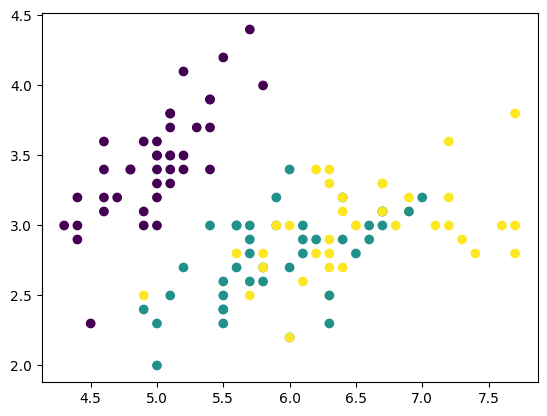

In [10]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train);

## 3. 打造函數機 3 部曲

### step 1: 打開一台空白的函數學習機

In [7]:
clf = SVC()

### step 2: 訓練

In [8]:
clf.fit(x_train, y_train)

SVC()

### step 3: 預測

In [9]:
y_pred = clf.predict(x_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print(f'正確率: {accuracy*100}%')

正確率: 90.0%


圖示化結果, 和最大宗點顏色不同就是錯的。

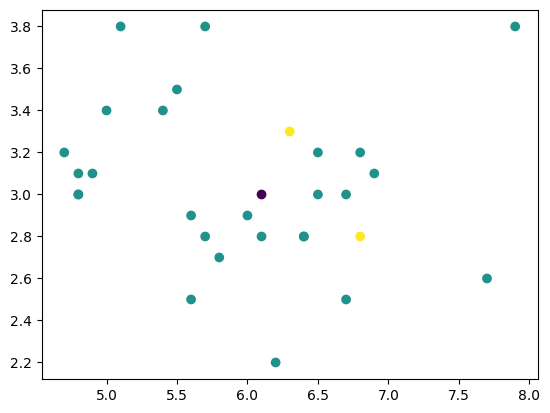

In [14]:
plt.scatter(x_test[:,0], x_test[:,1], c=y_pred-y_test);

## 4. 數據先用 PCA 降維

In [15]:
x = iris.data
y = iris.target

切訓練資料、測試資料。

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=42)

PCA 降維其實也是 3 部曲。

### step 1: 打開 PCA 函數學習機

In [20]:
pca = PCA(n_components=2) # 用 PCA 降到 2 維

### step 2: 訓練

In [21]:
x_train_reduced = pca.fit_transform(x_train)

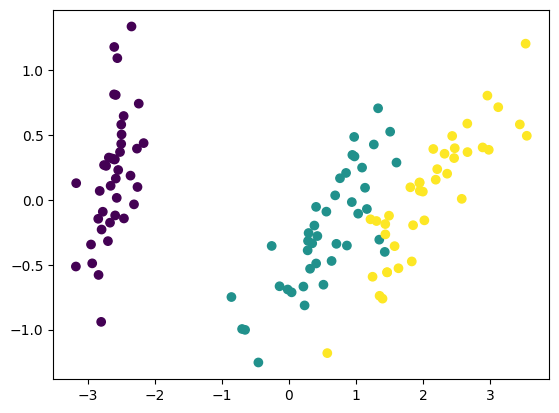

In [22]:
plt.scatter(x_train_reduced[:,0], x_train_reduced[:,1], c=y_train);

### step 3: 測試 (正確說是轉換測試集)

In [23]:
x_test_reduced = pca.transform(x_test)

## 5. 真正打造 SVM 函數學習機

### step 1: 打開一台 SVM 函數學習機

In [24]:
clf_pca = SVC()

### step 2: 訓練



In [25]:
clf_pca.fit(x_train_reduced, y_train)

SVC()

### step 3: 預測

In [26]:
y_pred = clf_pca.predict(x_test_reduced)

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print(f'正確率: {accuracy*100}%')

正確率: 100.0%


是不是真的變強了!! 最後再畫差異圖, 可以發現所有點顏色都相同 (也就是完全正確)。

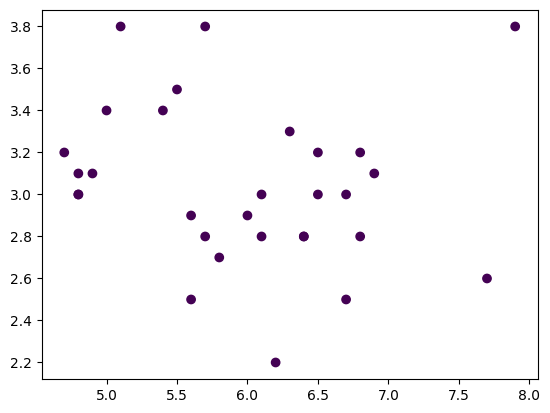

In [28]:
plt.scatter(x_test[:,0], x_test[:,1], c=y_pred-y_test);